In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
df = pd.read_csv("Crop_recommendation.csv")

# Check for missing values
df = df.dropna()

# Define features and target
features = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
y = df["label"]

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Save model and encoders
joblib.dump(model, "crop_prediction_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model, label encoder, and scaler saved successfully.")

# Manually input test values
manual_input = {
    "N": 5,
    "P": 62,
    "K": 23,
    "temperature": 27,
    "humidity": 66,
    "ph": 4.2,
    "rainfall": 148
}

# Convert input to DataFrame and standardize it
manual_input_df = pd.DataFrame([manual_input])
manual_input_scaled = scaler.transform(manual_input_df)

# Make prediction
predicted_label = model.predict(manual_input_scaled)[0]
predicted_crop = label_encoder.inverse_transform([predicted_label])[0]
print("Manual Test Prediction:", predicted_crop)

Model Accuracy: 99.32%
Model, label encoder, and scaler saved successfully.
Manual Test Prediction: pigeonpeas


C:\Users\b_nitish_durga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [2]:
newdf = pd.read_csv("Crop_recommendation.csv")

newdf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# Get unique values in the 'label' column
unique_labels = newdf["label"].unique()
label_count = newdf["label"].nunique()

print(f"Number of unique crops: {label_count}")
print("List of unique crops:")
print(unique_labels)

Number of unique crops: 22
List of unique crops:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
# !pip install seaborn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\b_nitish_durga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


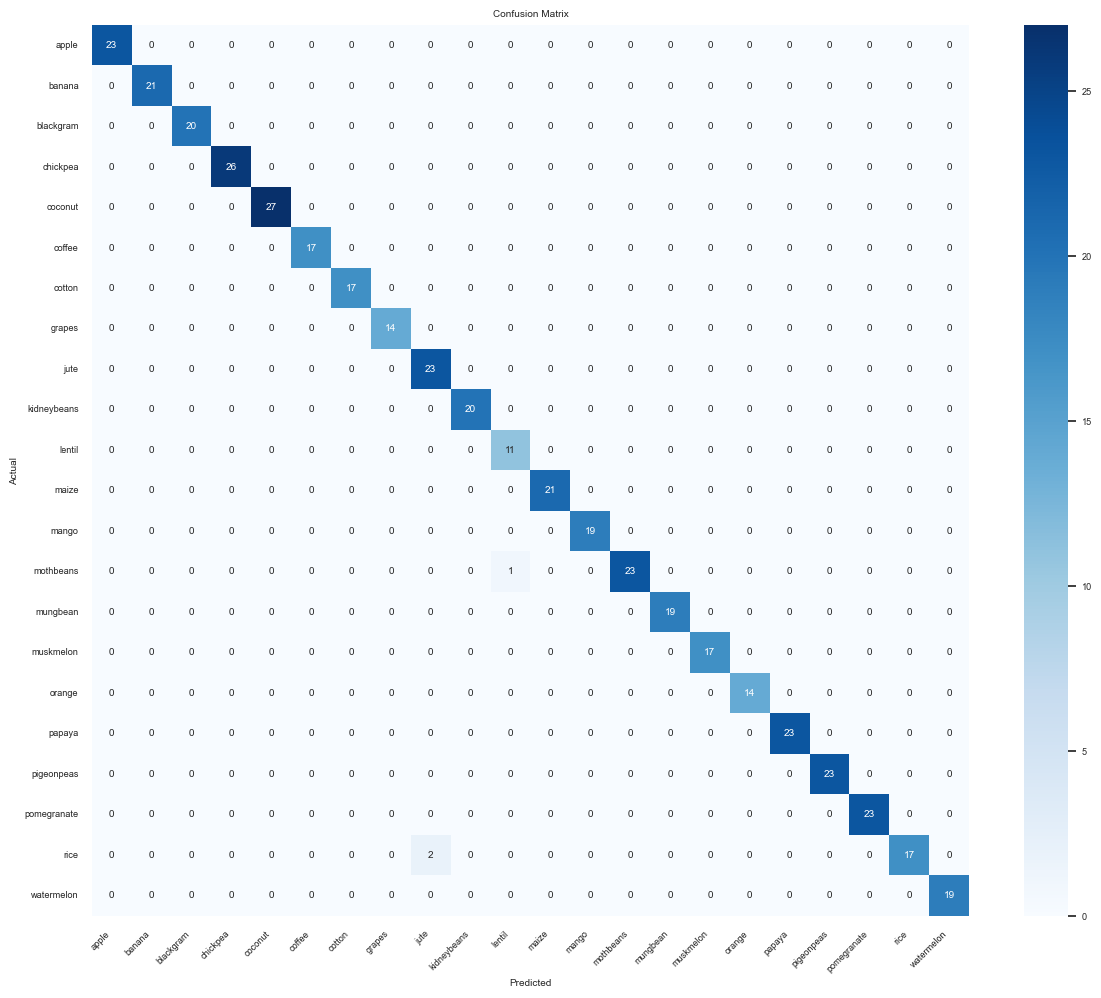

In [9]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

# Plot using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
